<a href="https://colab.research.google.com/github/mr-aditt/Deep-Learning-and-Applications/blob/main/LeNet-5/LeNet_5_using_CIFAR10_rgb2gray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras import layers
from matplotlib import pyplot as plt
import numpy as np
import keras

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Before:")
print("x_train: {}".format(x_train.shape))
print("x_test: {}\n".format(x_test.shape))

x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)

print("After:")
print("x_train: {}".format(x_train.shape))
print("x_test: {}".format(x_test.shape))



Before:
x_train: (50000, 32, 32, 3)
x_test: (10000, 32, 32, 3)

After:
x_train: (50000, 32, 32, 1)
x_test: (10000, 32, 32, 1)


In [ ]:
tf.shape( tf.squeeze(x_train[0]))

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([32, 32], dtype=int32)>

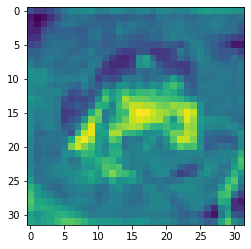

In [ ]:
plt.imshow(tf.squeeze(x_train[0]))

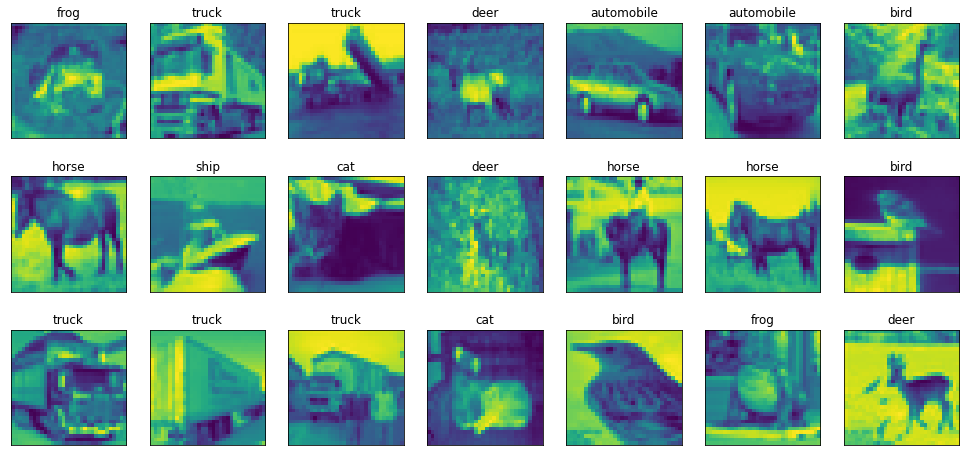

In [ ]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(tf.squeeze(x_train[index]))
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [ ]:
def lenet_5(in_shape=(32,32,1), n_classes=10, opt='sgd'):
    in_layer = layers.Input(in_shape)
    conv1 = layers.Conv2D(filters=6, kernel_size=5,strides=1, activation='relu')(in_layer)
    pool1 = layers.AvgPool2D()(conv1)
    conv2 = layers.Conv2D(filters=16, kernel_size=5, strides=1, activation='relu')(pool1)
    pool2 = layers.AvgPool2D()(conv2)
    flatten = layers.Flatten()(pool2)
    dense1 = layers.Dense(120, activation='relu')(flatten)
    dense2 = layers.Dense(84, activation='relu')(flatten)
    preds = layers.Dense(n_classes, activation='softmax')(dense1)

    model = Model(in_layer, preds)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
	              metrics=["accuracy"])
    return model


model = lenet_5()
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120 

In [ ]:
from keras.utils import to_categorical

# Change the labels from categorical to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', y_train_one_hot[0])

Original label: [6]
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
batch_size = 64
epochs = 20
num_classes = 10

rlenet_5 = model.fit(x_train, y_train_one_hot, batch_size=batch_size,validation_split=0.33,epochs=epochs,verbose=1)

Epoch 1/20
524/524 [==============================] - 21s 38ms/step - loss: 2.8900 - accuracy: 0.0980 - val_loss: 2.3031 - val_accuracy: 0.0991
Epoch 2/20
524/524 [==============================] - 20s 38ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3029 - val_accuracy: 0.1006
Epoch 3/20
524/524 [==============================] - 20s 38ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3029 - val_accuracy: 0.0974
Epoch 4/20
524/524 [==============================] - 21s 39ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3028 - val_accuracy: 0.1001
Epoch 5/20
524/524 [==============================] - 20s 39ms/step - loss: 2.3026 - accuracy: 0.1015 - val_loss: 2.3028 - val_accuracy: 0.0993
Epoch 6/20
524/524 [==============================] - 20s 39ms/step - loss: 2.3025 - accuracy: 0.1012 - val_loss: 2.3028 - val_accuracy: 0.0981
Epoch 7/20
524/524 [==============================] - 22s 42ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3028 - val_accuracy:

In [ ]:
test_eval = model.evaluate(x_test, y_test_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 2.3025999069213867
Test accuracy: 0.0989999994635582


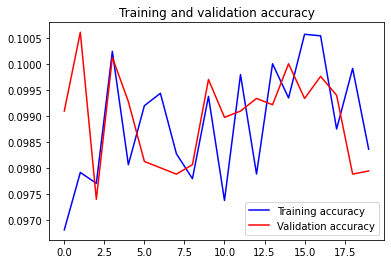

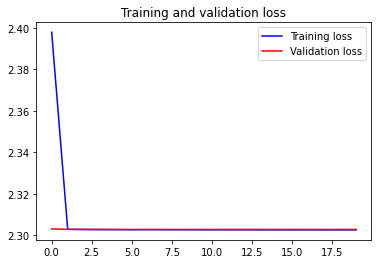

In [ ]:
accuracy = rlenet_5.history['accuracy']
val_accuracy = rlenet_5.history['val_accuracy']
loss = rlenet_5.history['loss']
val_loss = rlenet_5.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()